In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


 1. Read and display the image.

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


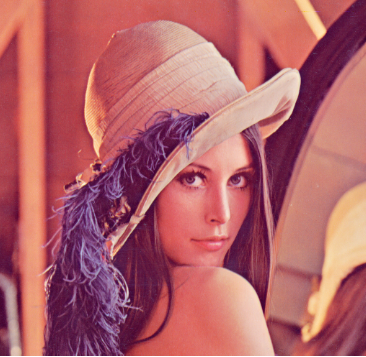

In [ ]:
image_colored = Image.open("/content/drive/MyDrive/6CS012/Worksheet 1/Copy of lenna_image.png").convert("RGB")
display(image_colored)
img_array = np.array(image_colored)

 2. Display only the top left corner of 100x100 pixels.

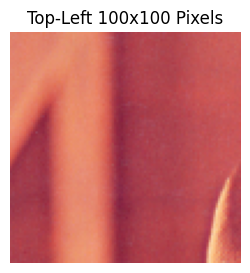

In [ ]:
top_left_100x100 = img_array[:100, :100]  # Extract the top-left region

plt.figure(figsize=(3,3))
plt.imshow(top_left_100x100)
plt.title("Top-Left 100x100 Pixels")
plt.axis("off")
plt.show()

3. Show the three color channels (R, G, B).

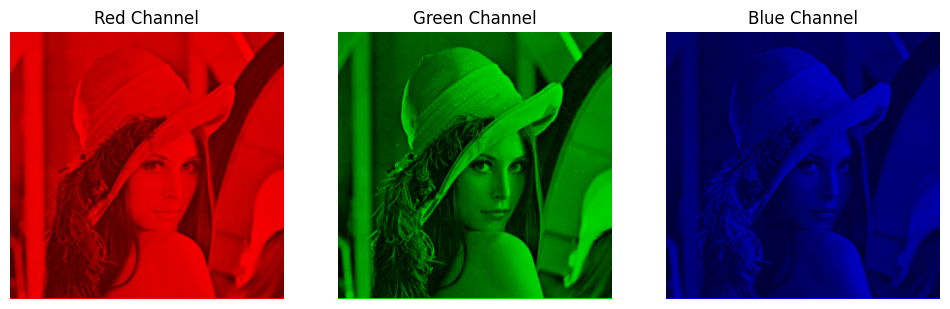

In [ ]:
# Red channel
red_channel = img_array.copy()
red_channel[:, :, 1:] = 0  # Remove Green and Blue

# Green channel
green_channel = img_array.copy()
green_channel[:, :, [0, 2]] = 0  # Remove Red and Blue

# Blue channel
blue_channel = img_array.copy()
blue_channel[:, :, :2] = 0  # Remove Red and Green

# Display R, G, B channels side by side
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(red_channel)
axes[0].set_title("Red Channel")
axes[0].axis("off")

axes[1].imshow(green_channel)
axes[1].set_title("Green Channel")
axes[1].axis("off")

axes[2].imshow(blue_channel)
axes[2].set_title("Blue Channel")
axes[2].axis("off")

plt.show()


 4. Modify the top 100 ×100 pixels to a value of 210 and display the resulting image:

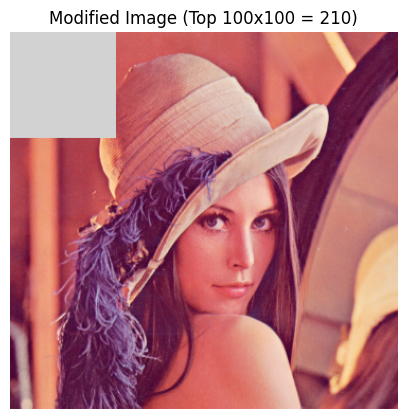

In [ ]:
modified_img = img_array.copy()
modified_img[:100, :100] = 210  # Set top-left 100x100 pixels to 210

plt.figure(figsize=(5,5))
plt.imshow(modified_img)
plt.title("Modified Image (Top 100x100 = 210)")
plt.axis("off")
plt.show()

Exercise- 2:

 1. Load and display a grayscale image.

In [ ]:
image_path = "/content/drive/MyDrive/6CS012/Worksheet 1/Copy of camera_man.jpg"  # Update the correct path
image_gray = Image.open(image_path).convert("L")  # Convert to grayscale


In [ ]:
gray_array = np.array(image_gray)

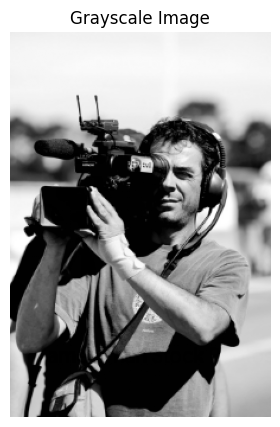

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(gray_array, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

2. Extract and display the middle section of the image (150 pixels).

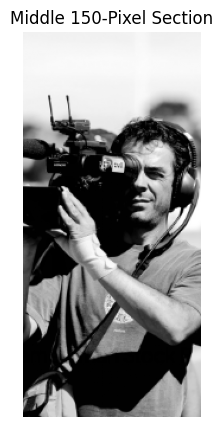

In [ ]:
height, width = gray_array.shape  # Get image dimensions
middle_x = width // 2  # Center of the width
middle_section = gray_array[:, middle_x-75:middle_x+75]  # Extract 150-pixel-wide section

plt.figure(figsize=(5,5))
plt.imshow(middle_section, cmap="gray")
plt.title("Middle 150-Pixel Section")
plt.axis("off")
plt.show()

 3. Apply a simple threshold to the image (e.g., set all pixel values below 100 to 0).

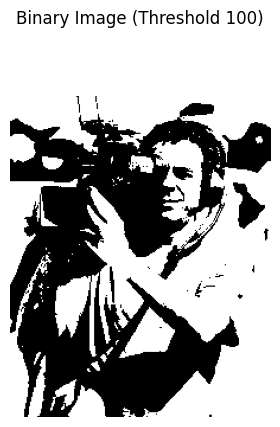

In [ ]:
threshold = 100
binary_image = np.where(gray_array < threshold, 0, 255).astype(np.uint8)  # Convert to binary (0 or 255)

plt.figure(figsize=(5,5))
plt.imshow(binary_image, cmap="gray")
plt.title("Binary Image (Threshold 100)")
plt.axis("off")
plt.show()

 4. Rotate the image 90 degrees clockwise and display the result.

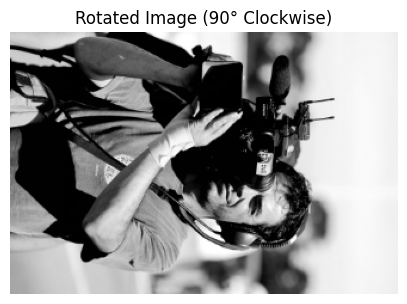

In [ ]:
rotated_image = np.rot90(gray_array, k=3)  # Rotate 90° clockwise (3 times counterclockwise)

plt.figure(figsize=(5,5))
plt.imshow(rotated_image, cmap="gray")
plt.title("Rotated Image (90° Clockwise)")
plt.axis("off")
plt.show()

5. Convert the grayscale image to an RGB image.

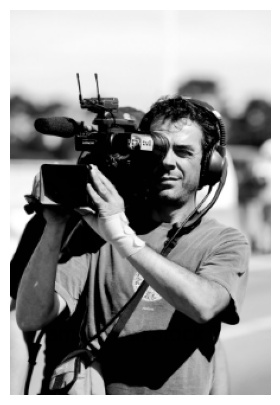

In [ ]:
rgb_image = np.stack([gray_array] * 3, axis=-1)  # Replicate grayscale into R, G, B channels

plt.figure(figsize=(5,5))
plt.imshow(rgb_image)

plt.axis("off")
plt.show()



 3 Image Compression and Decompression using PCA.

 1. Load and Prepare Data:

Fetch an image of you choice.{If colour convert to grayscale}

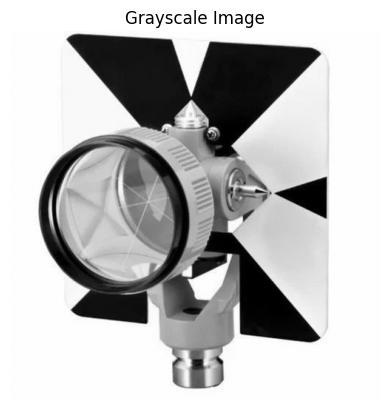

In [ ]:
# Load the image and convert it to grayscale
image_path = "/content/drive/MyDrive/6CS012/Worksheet 1/survey-prism-big-500x500.jpg"
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert the image to a NumPy array
image_array = np.array(image)  # Convert to NumPy array (no float conversion)

# Display the grayscale image using Matplotlib
plt.imshow(image_array, cmap="gray")  # Display in grayscale
plt.title("Grayscale Image")
plt.axis("off")
plt.show()


 • Center the dataset- Standaridze the Data.

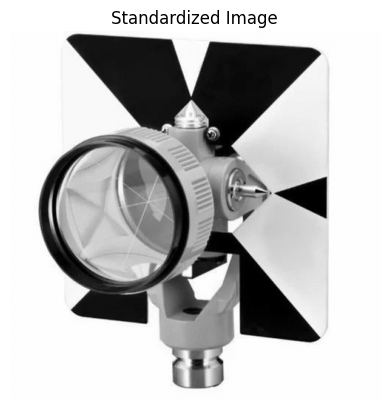

In [ ]:
# Standardize the data by centering (subtracting mean) and scaling (dividing by standard deviation)
mean = np.mean(image_array)
std_dev = np.std(image_array)
standardized_image = (image_array - mean) / std_dev

# Display the standardized image using Matplotlib
plt.imshow(standardized_image, cmap="gray")  # Display in grayscale
plt.title("Standardized Image")
plt.axis("off")
plt.show()

 • Calculate the covaraince matrix of the Standaridze data.

In [ ]:
covariance_matrix = np.cov(standardized_image, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix:")
print(covariance_matrix)

Covariance Matrix:
[[7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]
 [7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]
 [7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]
 ...
 [7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]
 [7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]
 [7.90441789e-29 7.90441789e-29 7.90441789e-29 ... 7.90441789e-29
  7.90441789e-29 7.90441789e-29]]


 2. Eigen Decomposition and Identifying Principal Components:

In [ ]:
# Eigen decomposition (compute eigenvalues and eigenvectors)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


In [ ]:
# Sort the eigenvalues in descending order and get the corresponding eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
eigenvalues_sorted = eigenvalues[sorted_indices]  # Sorted eigenvalues
eigenvectors_sorted = eigenvectors[:, sorted_indices]  # Sorted eigenvectors


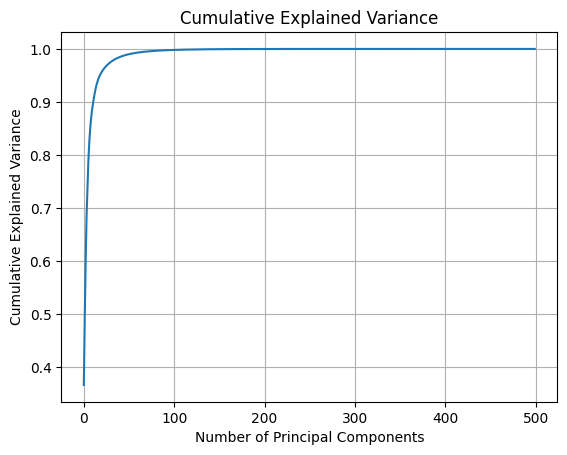

Top 5 Eigenvalues: [132.48842126  44.74221743  37.92045727  31.38069381  19.84619952]
Top 5 Eigenvectors:
 [[ 1.53986873e-30  2.09299591e-30 -1.17631209e-30  7.44372760e-31
  -1.44818365e-29]
 [-8.32667268e-17 -4.16333634e-17  1.38777878e-17 -2.42861287e-17
   2.77555756e-17]
 [ 4.44089210e-16  3.88578059e-16 -6.93889390e-17 -7.28583860e-17
  -2.81025203e-16]
 ...
 [ 8.67361738e-18  4.24870667e-18  8.01068159e-18 -2.95339753e-18
   7.42033677e-18]
 [ 8.67361738e-18  4.24890732e-18  8.01430195e-18 -2.93324809e-18
   7.55099284e-18]
 [ 7.77601596e-18  3.57965258e-18  8.29120805e-18 -3.51219400e-18
   7.72465315e-18]]


In [ ]:
# Plot the cumulative sum of the eigenvalues (Explained Variance)
# This helps in identifying how much variance is captured by each component
cumulative_variance = np.cumsum(eigenvalues_sorted) / np.sum(eigenvalues_sorted)

# Plot the cumulative explained variance
plt.plot(cumulative_variance)
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Choose the top k eigenvectors based on the sorted eigenvalues
k = 5  # Choose top 5 eigenvectors (can adjust this as needed)
top_k_eigenvectors = eigenvectors_sorted[:, :k]

print(f"Top {k} Eigenvalues:", eigenvalues_sorted[:k])
print(f"Top {k} Eigenvectors:\n", top_k_eigenvectors)

3. Reconstruction and Experiment:

• Reconstruction: Transform the original data by multiplying it with the selected eigenvec
tors(PCs) to obtain a lower-dimensional representation.

In [ ]:
# Select the number of principal components (k) for reconstruction
k = 50  # You can choose different values like 5, 10, 50, etc.

# Select the top k eigenvectors (Principal Components)
top_k_eigenvectors = eigenvectors_sorted[:, :k]  # Select top k eigenvectors

# Project the original standardized image onto the top k eigenvectors (lower-dimensional representation)
transformed_data = np.dot(standardized_image, top_k_eigenvectors)  # Lower-dimensional data

# Reconstruct the data by multiplying the transformed data back by the top k eigenvectors
reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T)  # Reconstructed image


 • Experiments: Pick Four different combination of principal components with various ex
plained variance value and compare the result.

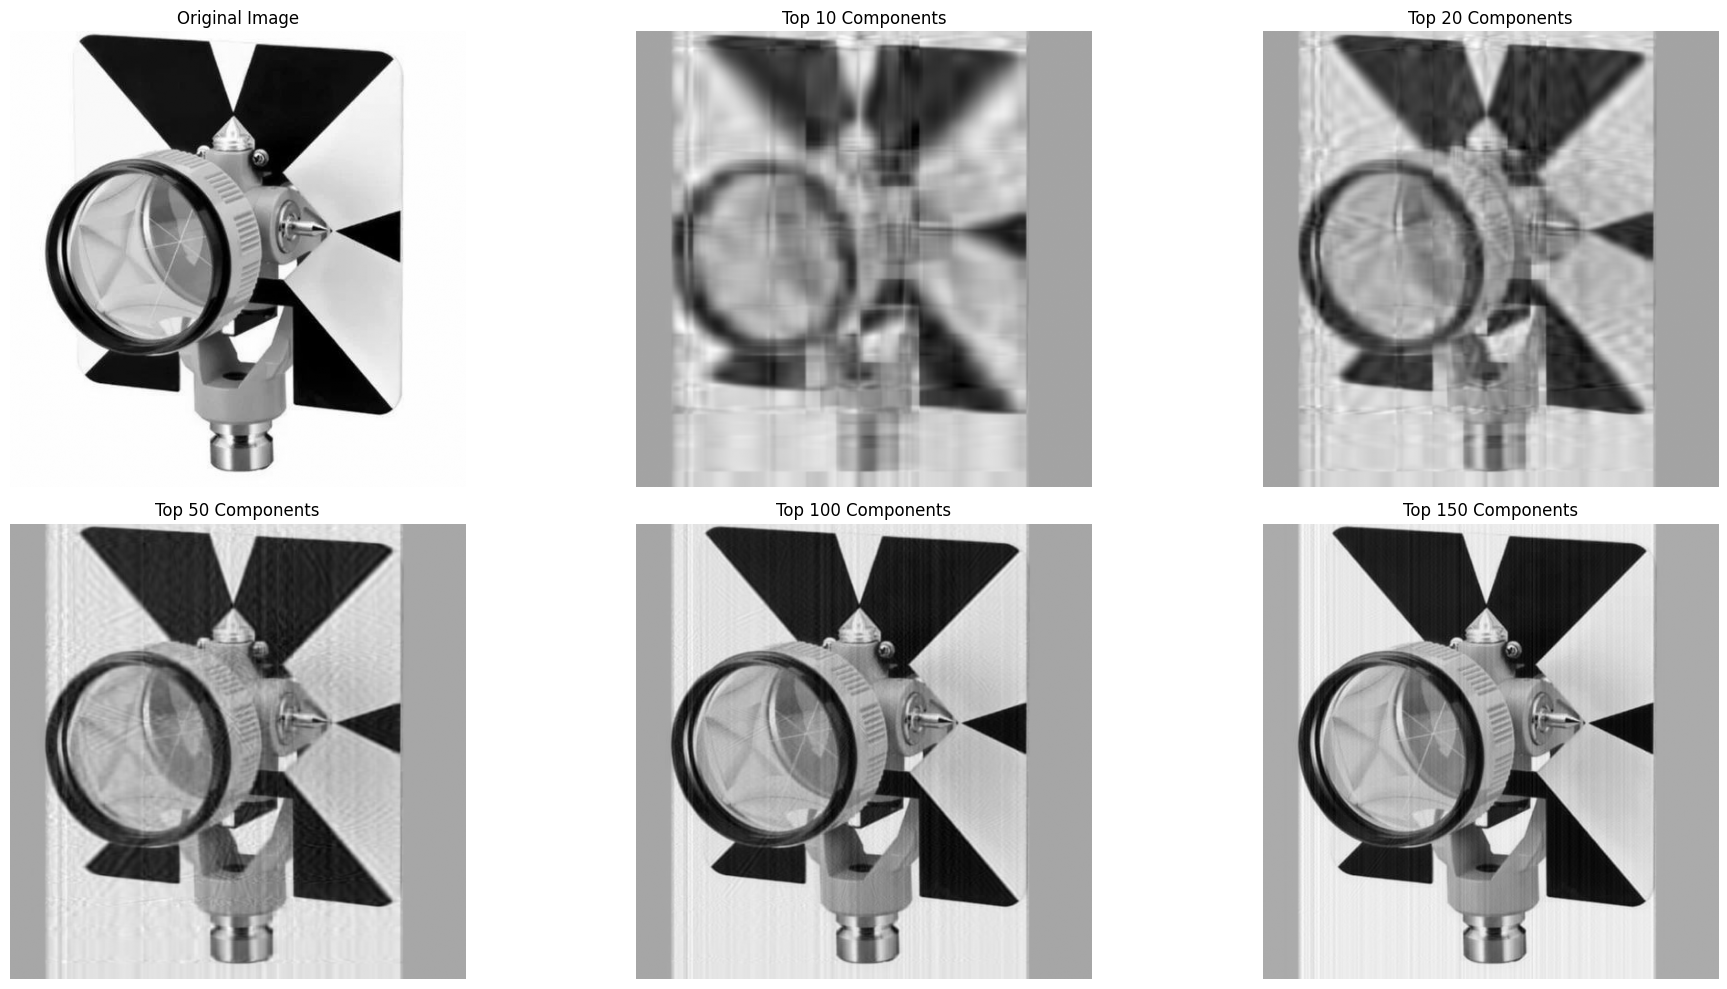

In [ ]:
# Define the number of principal components (k) for the experiments
k_values = [10, 20, 50, 100, 150]  # Experiment with 10, 20, 50, 100, and 150 PCs

# Create a figure with subplots arranged in 2 rows and 3 columns (for 6 images)
plt.figure(figsize=(20, 10))

# 1. Display the Original Grayscale Image first in the first row, first column
plt.subplot(2, 3, 1)
plt.imshow(standardized_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# For each k, perform the reconstruction and display in the remaining subplots
for idx, k in enumerate(k_values):
    # Select the top k eigenvectors
    top_k_eigenvectors = eigenvectors_sorted[:, :k]

    # Project the original standardized image onto the top k eigenvectors (lower-dimensional representation)
    transformed_data = np.dot(standardized_image, top_k_eigenvectors)

    # Reconstruct the data by multiplying the transformed data back by the top k eigenvectors
    reconstructed_data = np.dot(transformed_data, top_k_eigenvectors.T)

    # Display each reconstructed image in the corresponding subplot (top row: 2,3 and bottom row: 4,5,6)
    plt.subplot(2, 3, idx + 2)  # Start from second subplot for the reconstructed images
    plt.imshow(reconstructed_data, cmap='gray')
    plt.title(f'Top {k} Components')
    plt.axis('off')

# Show the images in a 2-row, 3-column layout
plt.tight_layout()
plt.show()
